## FEEG1002 - Statics 2

## Mohr's Circle

### Dr. Davis  - fmd1f14@soton.ac.uk

In this notebook, we're going to use Python/NumPy/Matplotlib to examine Mohr's Circle. There are two other notbooks that you should visit related to stress and strain transformations <a href= 'StressTransformation.ipynb'>Stress and Strain Transformations</a> and <a href ='Strain Gauges.ipynb'>Strain Gauges</a>. The Stress and Strain Transformation notebook will calculate the stresses and/or strain after a rotation about the $z$-axis.  The Strain Gauge notebook uses the strain transformation equations from <a href= 'StressTransformation.ipynb'>the stress and strain transformation notebook</a> to perform strain gauge calculations.

In [1]:
# Load necessary functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Mohr's circle

Mohr's circle is an alternative method to perform stress (or strain) rotations based on geometric considerations.  For the stress element shown on the left the resulting Mohr's circle is drawn on the right.

<table>
<tr>
<td> <img src="GenStressState.jpg" alt="General Stress State" width="250" height="236"></td>
<td> <img src="MohrsCircle.jpg" alt="Mohr's Circle" width="454" height="500"></td>
</tr>
</table>

The two points where there is zero shear stress are refered to as the principal stresses and denoted $\sigma_I$ and $\sigma_{II}$.  The center of the circle is $\frac{\sigma_{I} + \sigma_{II}}{2}$ which is also equal to $\frac{\sigma_{xx} + \sigma_{yy}}{2}$ since the trace of the stress matrix is invariant:

$$ \mathrm{I}_1 = \mathrm{tr}(\sigma) = \sigma_{xx} + \sigma_{yy} = \sigma_{I} + \sigma_{II} \,.$$ 

The radius, $R$, can easily be calculated using the Pythagorean theorem:

\begin{align}
R^2 &= \left( \sigma_{xx} - \left(\frac{\sigma_{xx} + \sigma_{yy}}{2} \right) \right)^2 + \left(\sigma_{xy}\right)^2 \\
&= \left( \frac{\sigma_{xx} - \sigma_{yy}}{2} \right)^2 + \left(\sigma_{xy}\right)^2 \,.
\end{align}

Knowing the location of the center and the radius of the circle, the entire Mohr's circle can be constructed.  Remeber that since the equations for Mohr's circle were derived using the double angle formulas, see **Lecture 8**, the rotations on Mohr's circle are in terms of $2 \theta$.

One intersting property is that the planes of maximum shearing stress are located $45^\circ$ from the principal planes.  This relationship can be used to derive the relationship between $E$, $\nu$, and $G$ as shown <a href = 'IsotropicMatModel.pdf'> here </a>.

The cells below take in a stress (or strain) matrix to plot Mohr's circle and calculate the principal stresses (or strains).  The input stress (strain) points are shown as yellow circles, the maximum shear stress as a blue square, and the principal stresses and red triangles.

For more information on Mohr's circle revisit **Lecture 8**.

In [2]:
# Input the stress (or strain) matrix 

#The stress or strain array is [sigma_xx, sigma_yy, sigma_xy]
S_array = np.array([[50], [-10], [40]])

In [3]:
# Calculate the principal stresses (or strains)
MaxPrincp = (S_array[0] + S_array[1])/2 + sqrt(((S_array[0] - S_array[1])/2)**2 + S_array[2]**2)
MinPrincp = (S_array[0] + S_array[1])/2 - sqrt(((S_array[0] - S_array[1])/2)**2 + S_array[2]**2)
MaxShear = sqrt(((S_array[0] - S_array[1])/2)**2 + S_array[2]**2)
Center = (S_array[0]+ S_array[1])/2

print('Maximum principal stress (or strain): %.2f' % MaxPrincp)
print('Miniumum principal stress (or strain): %.2f' % MinPrincp)
print('Maximum shear stress (or strain): %.2f' % MaxShear)
print('The center of Mohr''s circle is : %.2f' % Center)

Maximum principal stress (or strain): 70.00
Miniumum principal stress (or strain): -30.00
Maximum shear stress (or strain): 50.00
The center of Mohrs circle is : 20.00


(-40.0, 80.0, -60.0, 60.0)

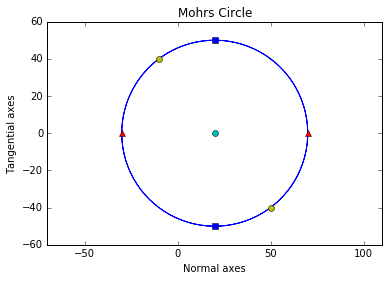

In [4]:
# Use the matrix values to plot Mohr's circle, highlight the input points

angles = linspace(0, 360, 181)

def mCirc_x(t):
    return (S_array[0] + S_array[1])/2 + (S_array[0] - S_array[1])/2*cos(math.radians(t)*2) + S_array[2]*sin(math.radians(t)*2)

f = vectorize(mCirc_x)

def mCirc_y(t):
    return -(S_array[0] - S_array[1])/2*sin(math.radians(t)*2) + S_array[2]*cos(math.radians(t)*2)

g = vectorize(mCirc_y)

plot(f(angles), g(angles), 'b', 
     S_array[0], -S_array[2], 'yo',
     S_array[1], S_array[2], 'yo',
     MaxPrincp, 0, 'r^', 
     MinPrincp, 0, 'r^',
     (S_array[0]+ S_array[1])/2, MaxShear, 'bs',
     (S_array[0]+ S_array[1])/2, -MaxShear, 'bs',
     (S_array[0]+ S_array[1])/2, 0, 'co')
#legend('Mohr''s circle', 'Input points', '', 'Principal stress', '', 'Max Shear', '', 'Center')
xlabel('Normal axes')
ylabel('Tangential axes')
title('Mohr''s Circle')
axis('equal')